In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Import expression dataset.
source: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [2]:
dataset = pd.read_csv("data/fer2013.csv")

In [3]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
dataset.shape

(35887, 3)

# Pre-processing data
Preparing data for modeling

In [5]:
# Mapping integer to emotion value
emotions_dict = {0: 'Angry',
                 1: 'Disgust',
                 2: 'Fear',
                 3: 'Happy',
                 4: 'Sad',
                 5: 'Surprise',
                 6: 'Neutral'}

#### Understanding Usage Column:
The given dataset is already tagged distinct sets:

In [6]:
dataset.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [7]:
print(sum(dataset['Usage'] == 'Training'))
print(sum(dataset['Usage'] == 'PublicTest'))
print(sum(dataset['Usage'] == 'PrivateTest'))

28709
3589
3589


Therefore, we can see that 80% of the dataset is tagged as 'Training' and 10% as PublicTest and PrivateTest each respectively. <br>
Next, using these tags form Training, Validation and Test data sets.


### Understanding and normalizing pixels column   

In [8]:
print(dataset['pixels'][1])
len(dataset['pixels'][1])

151 150 147 155 148 133 111 140 170 174 182 154 153 164 173 178 185 185 189 187 186 193 194 185 183 186 180 173 166 161 147 133 172 151 114 161 161 146 131 104 95 132 163 123 119 129 140 120 151 149 149 153 137 115 129 166 170 181 164 143 157 156 169 179 185 183 186 186 184 190 191 184 186 190 183 175 168 160 147 136 135 167 136 108 153 167 149 137 111 90 134 162 121 122 141 137 151 151 156 143 116 124 159 164 174 169 135 144 155 153 164 170 176 178 177 178 187 185 181 182 183 181 178 170 164 158 148 144 130 136 173 130 97 137 167 157 138 113 90 138 168 109 123 146 151 152 155 127 113 159 167 170 171 142 131 140 154 162 168 169 169 164 168 173 176 179 178 176 173 172 170 161 154 152 146 145 137 124 130 171 124 102 133 164 152 138 110 86 154 149 100 139 153 151 136 113 142 159 161 174 150 127 136 140 154 164 163 167 173 172 171 170 167 168 172 167 162 161 160 163 163 154 145 146 140 133 122 135 167 127 101 126 164 147 132 95 91 166 115 113 158 143 121 134 153 153 164 162 131 130 136 146

8687

In [9]:
type(dataset.pixels[0])

str

### Convert space seperated string into a 48 x 48 integer array for every record

In [10]:
#Checking on one record
image = np.fromstring(dataset.pixels[0], dtype=int, sep=' ')
image = np.reshape(image, (48, 48))

In [11]:
image

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]])

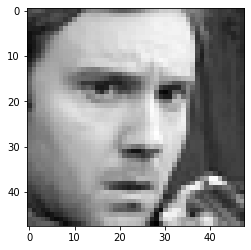

In [12]:
plt.imshow(image, interpolation = 'none', cmap='gray')

# Auxillary functions:

In [13]:
#Creating Integer array of pixels for each record:

def get_matrix_and_labels(data):
    """
        Prepare pixel matrix for each image.
        and return list of labels along with pixels.
    """
    image_mat_list = np.zeros(shape=(len(data), 48, 48))
    label_list = np.array(list(map(int,data['emotion'])))
    
    for i,pixels in enumerate(data['pixels']):
        image = np.fromstring(pixels, dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        
        image_mat_list[i] = image
    
    return image_mat_list, label_list


# plots 1 image for every emotion
def plot_every_emotion():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    
    axs = axs.ravel()
    
    for i in range(7):
        idx = dataset[dataset['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions_dict[i])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

        
# returns class weights
def get_class_weights():
    samples = dataset[dataset["Usage"] == "Training"]
    filtered_samples = samples[dataset["emotion"] !=1]
    count = len(filtered_samples)
    ratio_list = [samples["emotion"].value_counts().sort_index()/count]
    ratio_list = ratio_list[0].tolist()
    return dict(zip(range(0,7), ratio_list))


# Plot training vs Validation loss
def plot_train_loss(history):
    loss = history.history['loss']
    loss_val = history.history['val_loss']
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, loss, 'r', label='loss_train')
    plt.plot(epochs, loss_val, 'c', label='loss_val')
    plt.title('loss function values')
    plt.xlabel('epochs')
    plt.ylabel('value of the loss function')
    plt.legend()
    plt.grid()
    plt.show()

    
# plot training vs validation accuracy
def plot_train_acc(history):
    loss = history.history['loss']
    acc = history.history['accuracy']
    acc_val = history.history['val_accuracy']
    epochs = range(1, len(loss)+1)
    plt.plot(epochs, acc, 'r', label='accuracy_train')
    plt.plot(epochs, acc_val, 'c', label='accuracy_val')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.ylabel('acc value')
    plt.legend()
    plt.grid()
    plt.show()

    
# Visualize training generator images
def gen_images(training_generator):
    plt.figure(figsize=(10,5))
    for i in range(6):
        plt.subplot(2,3,i+1)
        for x,y in training_generator:
            plt.imshow((x[0]).reshape(48,48),cmap='gray')
            plt.title('y={}'.format(y[0]))
            plt.axis('off')
            break
    plt.tight_layout()
    plt.show()

    
# def plot emotion and image: Softmax results
def plot_emotion_range(pred_test_labels,image_number):

    fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

    bar_label = emotions_dict.values()

    axs[0].imshow(test_images[image_number][:,:,0], 'gray')
    axs[0].set_title(emotions_dict[np.argmax(test_labels[image_number])])

    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.8)
    axs[1].grid()

    plt.show()

    
#helper function to plot confusion matrix
def confusion_mat_plot(pred_labels):
    y_labels = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
    cm = confusion_matrix(raw_test_labels,pred_labels)
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap="OrRd")
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + y_labels)
    ax.set_yticklabels([''] + y_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

#### Dividing into train, test and validation sets

In [14]:
train_set, train_labels = get_matrix_and_labels(dataset[dataset['Usage'] == 'Training'])
val_set, val_labels = get_matrix_and_labels(dataset[dataset['Usage'] == 'PrivateTest'])
test_set, raw_test_labels = get_matrix_and_labels(dataset[dataset['Usage'] == 'PublicTest'])

#### Normalize the image data for learning

In [15]:
# Normalization: Scale the distribution to 0<= x <= 1
train_images = train_set.reshape((train_set.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_set.reshape((val_set.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_set.reshape((test_set.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

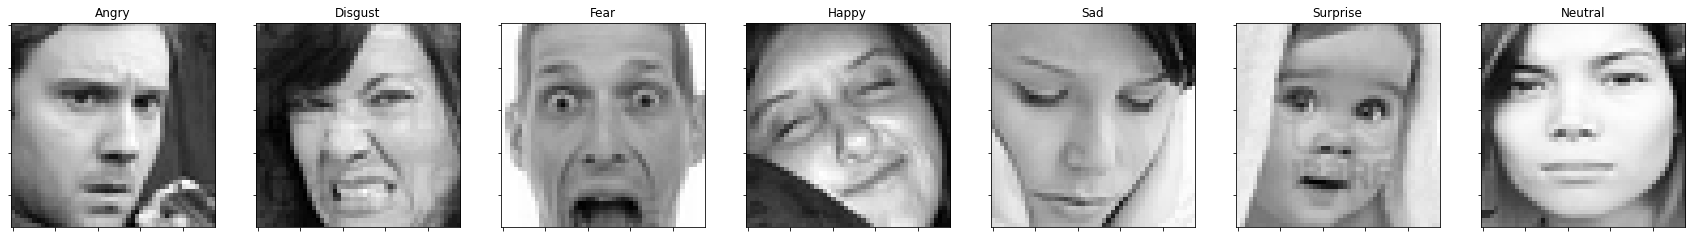

In [16]:
plot_every_emotion()

## Visualizing processed data

In [17]:
labels = list(emotions_dict.values())
train_emotions =  []

for i in range(7):
    train_emotions.append(sum(train_labels==i))

val_emotions = []
for i in range(7):
    val_emotions.append(sum(val_labels==i))


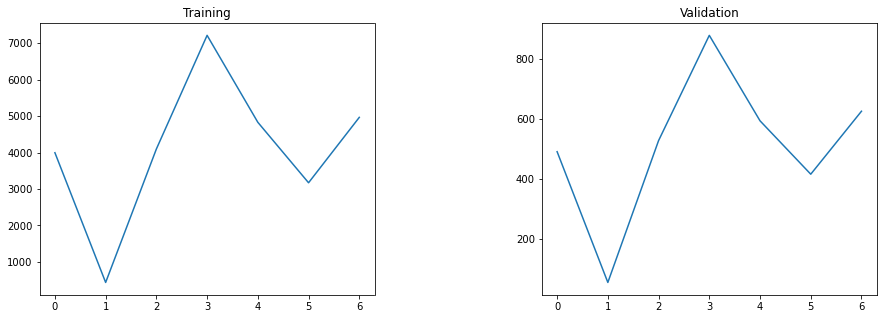

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax1.set_title("Training")
ax1.plot(train_emotions)
ax2.set_title("Validation")
ax2.plot(val_emotions)

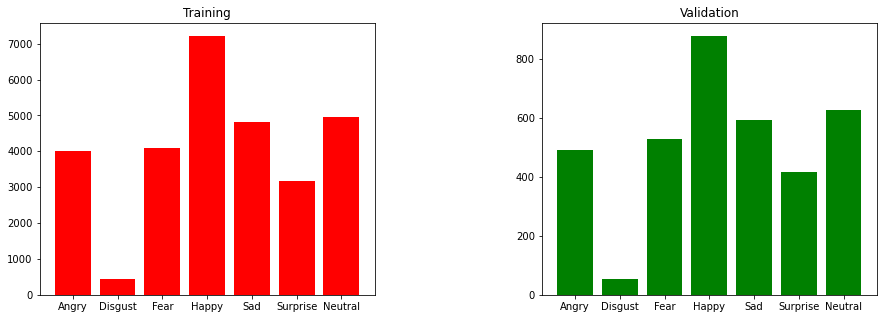

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax1.set_title("Training")
ax1.bar(labels, train_emotions, color ='red')
ax2.set_title("Validation")
ax2.bar(labels, val_emotions, color = 'green')
plt.show()

### Obsevations:
The samples available for disgust emotion seems insufficient for the model to learn it accurately. 
It might also cause misclassification for other samples if trained. Therefore, it makes sense to drop samples with "Disgust" as labels from all 3 datasets.

In [20]:
train_images = train_images[train_labels!=1]
train_labels = np.array([x for x in train_labels if x!=1])

In [21]:
val_images = val_images[val_labels!=1]
val_labels = np.array([x for x in val_labels if x!=1])

In [22]:
# will use raw_test_labels for plots ahead
test_images = test_images[raw_test_labels!=1]
raw_test_labels = np.array([x for x in raw_test_labels if x!=1])

In [23]:
labels = list(emotions_dict.values())
train_emotions =  []

for i in range(7):
    train_emotions.append(sum(train_labels==i))

val_emotions = []
for i in range(7):
    val_emotions.append(sum(val_labels==i))

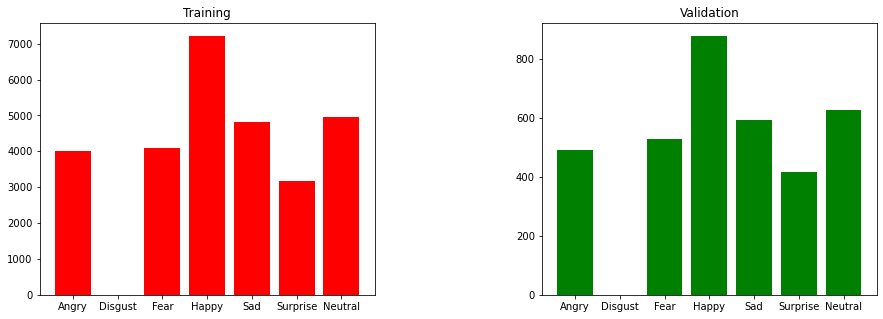

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax1.set_title("Training")
ax1.bar(labels, train_emotions, color ='red')
ax2.set_title("Validation")
ax2.bar(labels, val_emotions, color = 'green')
plt.show()

In [25]:
# Save normalized data in a csv at this point
# pd.DataFrame(array_name).to_csv("file/path.csv")

# Building a model

In [26]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical

In [27]:
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(raw_test_labels)

### Addressing class imbalance:
Further from the plots above we can see there is a considerable difference between the majority class ("Happy") and rest of the class. Introducing class weights to the model will address this imbalance.

In [28]:
class_weights = get_class_weights()
class_weights

<ipython-input-13-4fdd2e498d1b>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_samples = samples[dataset["emotion"] !=1]


{0: 0.14130088777278677,
 1: 0.01542107310861953,
 2: 0.1449085700137941,
 3: 0.25519046440066495,
 4: 0.17083436494181728,
 5: 0.11215647437484526,
 6: 0.17560923849609167}

#### Note:
The value for emotion 1 ("Disgust") is incorrect but insignificant as the samples with label 1 are removed from the training set. All other class weights are accurate. 

In [29]:
train_images.shape

(28273, 48, 48, 1)

In [30]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [31]:
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [33]:
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weights,
                    epochs=15,
                    batch_size=64)

Epoch 1/15
442/442 [==============================] - 43s 97ms/step - loss: 0.2796 - accuracy: 0.3077 - val_loss: 1.5342 - val_accuracy: 0.3947
Epoch 2/15
442/442 [==============================] - 43s 98ms/step - loss: 0.2388 - accuracy: 0.4237 - val_loss: 1.4618 - val_accuracy: 0.4400
Epoch 3/15
442/442 [==============================] - 44s 100ms/step - loss: 0.2179 - accuracy: 0.4802 - val_loss: 1.3012 - val_accuracy: 0.4830
Epoch 4/15
442/442 [==============================] - 44s 100ms/step - loss: 0.2038 - accuracy: 0.5165 - val_loss: 1.2971 - val_accuracy: 0.4994
Epoch 5/15
442/442 [==============================] - 45s 101ms/step - loss: 0.1940 - accuracy: 0.5416 - val_loss: 1.2754 - val_accuracy: 0.5122
Epoch 6/15
442/442 [==============================] - 47s 106ms/step - loss: 0.1855 - accuracy: 0.5640 - val_loss: 1.2054 - val_accuracy: 0.5345
Epoch 7/15
442/442 [==============================] - 48s 108ms/step - loss: 0.1769 - accuracy: 0.5838 - val_loss: 1.2323 - val_accu

In [34]:
trained_model = "cnn_model1.h5"

model.save(trained_model)

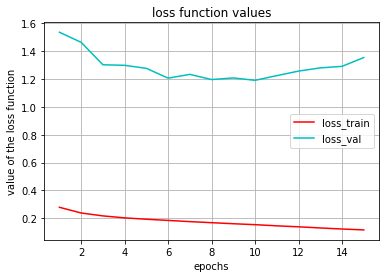

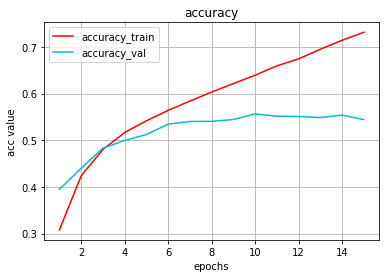

In [35]:
plot_train_loss(history)
plot_train_acc(history)

# 2. Using Data Augmentation

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [37]:
datagen = ImageDataGenerator(shear_range=0.1,
                             rotation_range=30,
                             horizontal_flip=True)


In [38]:
training_generator = datagen.flow(train_images, train_labels, batch_size=64,seed=7)
validation_generator = datagen.flow(val_images, val_labels, batch_size=64,seed=7)

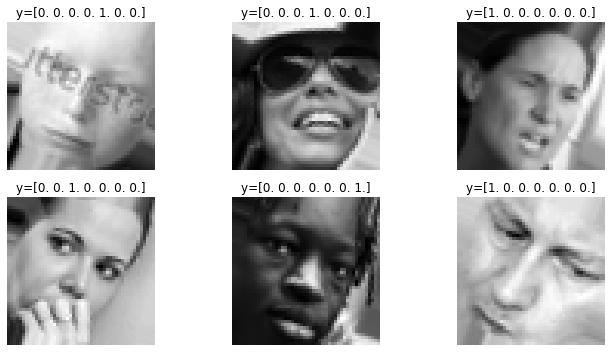

In [39]:
gen_images(training_generator)

In [41]:
history2 = model.fit(training_generator,
                    validation_data= validation_generator,
                    class_weight = class_weights,
                    epochs=20,
                    batch_size=64)

Epoch 1/20
442/442 [==============================] - 48s 108ms/step - loss: 0.1874 - accuracy: 0.5542 - val_loss: 1.2022 - val_accuracy: 0.5320
Epoch 2/20
442/442 [==============================] - 51s 115ms/step - loss: 0.1852 - accuracy: 0.5627 - val_loss: 1.2227 - val_accuracy: 0.5320
Epoch 3/20
442/442 [==============================] - 51s 115ms/step - loss: 0.1836 - accuracy: 0.5669 - val_loss: 1.2222 - val_accuracy: 0.5195
Epoch 4/20
442/442 [==============================] - 53s 120ms/step - loss: 0.1825 - accuracy: 0.5664 - val_loss: 1.1835 - val_accuracy: 0.5402
Epoch 5/20
442/442 [==============================] - 52s 117ms/step - loss: 0.1803 - accuracy: 0.5739 - val_loss: 1.1938 - val_accuracy: 0.5467
Epoch 6/20
442/442 [==============================] - 49s 112ms/step - loss: 0.1792 - accuracy: 0.5720 - val_loss: 1.1835 - val_accuracy: 0.5498
Epoch 7/20
442/442 [==============================] - 51s 115ms/step - loss: 0.1771 - accuracy: 0.5778 - val_loss: 1.1554 - val_ac

In [42]:
trained_model2 = "cnn_data_aug1.h5"

model.save(trained_model2)

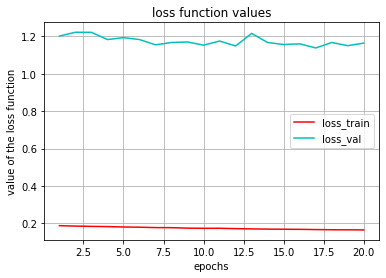

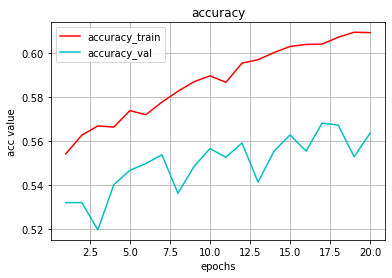

In [45]:
plot_train_loss(history2)
plot_train_acc(history2)

In [43]:
model1 = load_model("cnn_model1.h5")
model1

In [44]:
model2 = load_model("cnn_data_aug1.h5")
model2

## Predictions

In [46]:
pred_test_labels_1 = model1.predict(test_images)

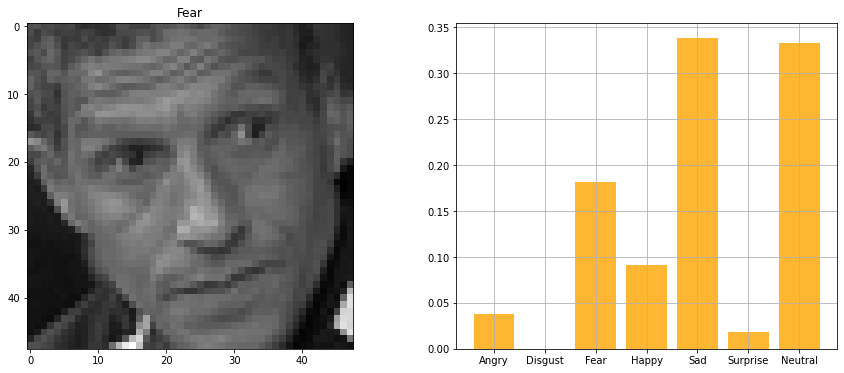

In [49]:
plot_emotion_range(pred_test_labels_1, 24)

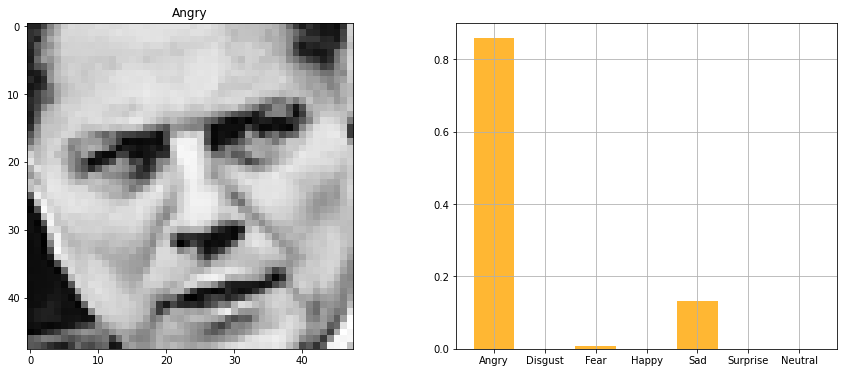

In [50]:
plot_emotion_range(pred_test_labels_1, 100)

In [51]:
pred_labels_formatted = [np.argmax(x) for x in pred_test_labels_1]
pred_categorical = to_categorical(pred_labels_formatted)

In [149]:
# pred_labels_formatted

# Evaluation

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

### cnn_model_1 evaluation

In [53]:
accuracy_score(raw_test_labels, pred_labels_formatted)

0.5406170393433343

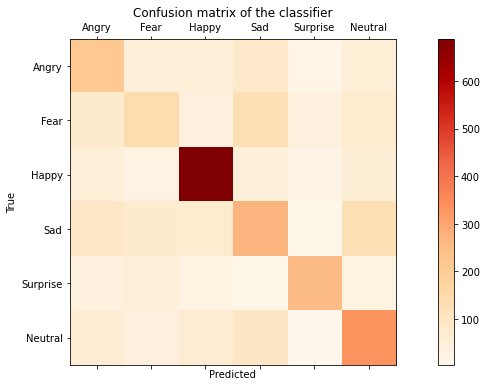

In [54]:
confusion_mat_plot(pred_labels_formatted)

In [55]:
pred_test_labels2=model2.predict(test_images)

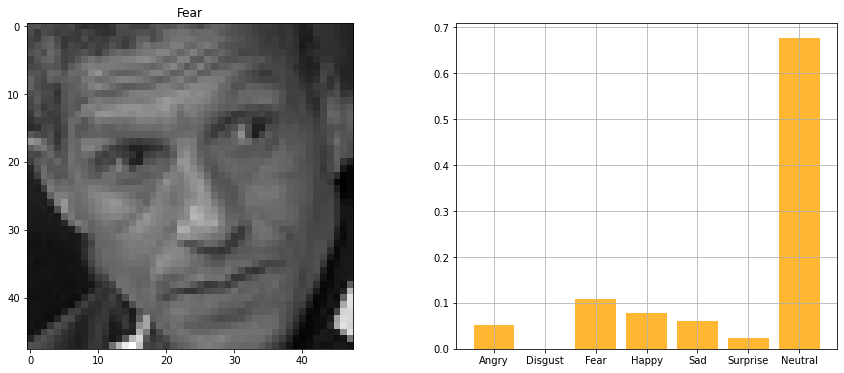

In [57]:
plot_emotion_range(pred_test_labels2, 24)

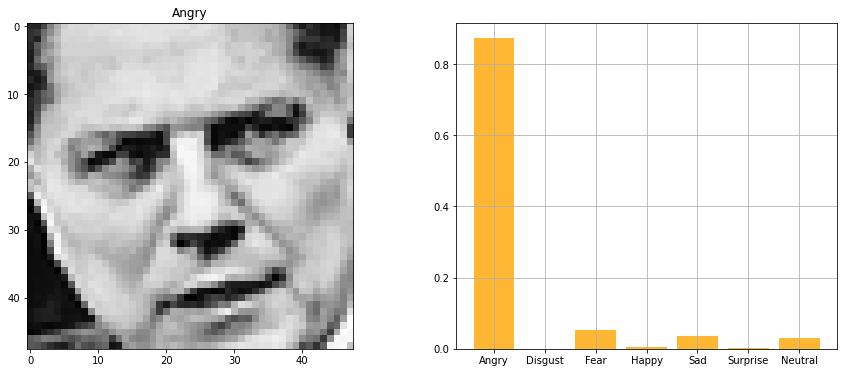

In [58]:
plot_emotion_range(pred_test_labels2, 100)

In [59]:
pred_labels_formatted2 = [np.argmax(x) for x in pred_test_labels2]
pred_categorical2 = to_categorical(pred_labels_formatted2)

### cnn_data_aug1 evaluation

In [60]:
accuracy_score(raw_test_labels, pred_labels_formatted2)

0.5658080951033116

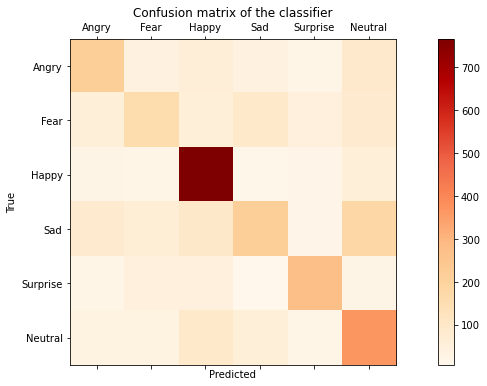

In [61]:
confusion_mat_plot(pred_labels_formatted2)

# RUN 2: Adding Regularization using Dropout

In [62]:
model3 = models.Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPool2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(7, activation='softmax'))

In [63]:
model3.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)         

In [64]:
history3 = model3.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weights,
                    epochs=15,
                    batch_size=64)

Epoch 1/15
442/442 [==============================] - 52s 117ms/step - loss: 0.2722 - accuracy: 0.3271 - val_loss: 1.4801 - val_accuracy: 0.4089
Epoch 2/15
442/442 [==============================] - 51s 115ms/step - loss: 0.2318 - accuracy: 0.4420 - val_loss: 1.3403 - val_accuracy: 0.4762
Epoch 3/15
442/442 [==============================] - 51s 115ms/step - loss: 0.2126 - accuracy: 0.4920 - val_loss: 1.3220 - val_accuracy: 0.4929
Epoch 4/15
442/442 [==============================] - 54s 122ms/step - loss: 0.2012 - accuracy: 0.5225 - val_loss: 1.2278 - val_accuracy: 0.5221
Epoch 5/15
442/442 [==============================] - 54s 122ms/step - loss: 0.1913 - accuracy: 0.5490 - val_loss: 1.2479 - val_accuracy: 0.5156
Epoch 6/15
442/442 [==============================] - 54s 122ms/step - loss: 0.1836 - accuracy: 0.5691 - val_loss: 1.2282 - val_accuracy: 0.5226
Epoch 7/15
442/442 [==============================] - 53s 119ms/step - loss: 0.1759 - accuracy: 0.5858 - val_loss: 1.1587 - val_ac

In [65]:
trained_model = "cnn_model2.h5"

model3.save(trained_model)

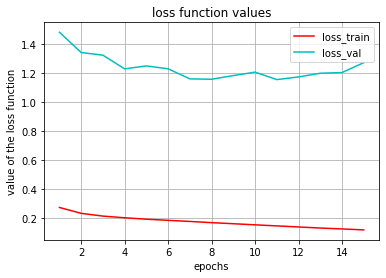

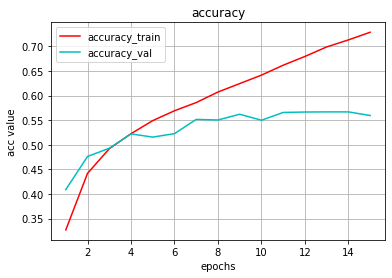

In [66]:
plot_train_loss(history3)
plot_train_acc(history3)

In [67]:
#Uses the same generator defined of "cnn_data_aug1" model
history4 = model3.fit(training_generator,
                    validation_data= validation_generator,
                    class_weight = class_weights,
                    epochs=20,
                    batch_size=64)

Epoch 1/20
442/442 [==============================] - 56s 128ms/step - loss: 0.2105 - accuracy: 0.5050 - val_loss: 1.2903 - val_accuracy: 0.5011
Epoch 2/20
442/442 [==============================] - 55s 124ms/step - loss: 0.2001 - accuracy: 0.5240 - val_loss: 1.2425 - val_accuracy: 0.5170
Epoch 3/20
442/442 [==============================] - 54s 123ms/step - loss: 0.1956 - accuracy: 0.5367 - val_loss: 1.2290 - val_accuracy: 0.5252
Epoch 4/20
442/442 [==============================] - 53s 120ms/step - loss: 0.1912 - accuracy: 0.5449 - val_loss: 1.2257 - val_accuracy: 0.5235
Epoch 5/20
442/442 [==============================] - 54s 123ms/step - loss: 0.1893 - accuracy: 0.5536 - val_loss: 1.2011 - val_accuracy: 0.5328
Epoch 6/20
442/442 [==============================] - 52s 118ms/step - loss: 0.1872 - accuracy: 0.5557 - val_loss: 1.2383 - val_accuracy: 0.5201
Epoch 7/20
442/442 [==============================] - 53s 120ms/step - loss: 0.1857 - accuracy: 0.5602 - val_loss: 1.1964 - val_ac

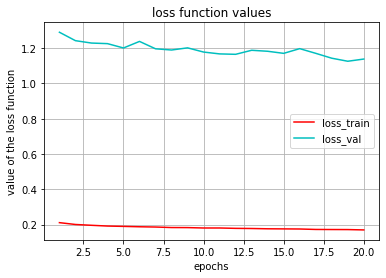

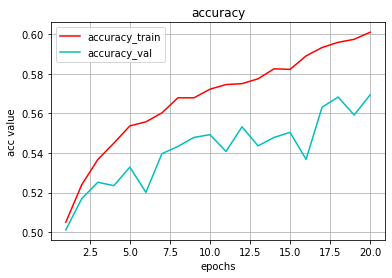

In [68]:
plot_train_loss(history4)
plot_train_acc(history4)

In [70]:
trained_model = "cnn_data_aug2.h5"

model3.save(trained_model)

In [71]:
model3 = load_model("cnn_model2.h5")
model3

In [73]:
model4 = load_model("cnn_data_aug2.h5")
model4

In [74]:
pred_test_labels_4 = model4.predict(test_images)
pred_labels_formatted_4 = [np.argmax(x) for x in pred_test_labels_4]
pred_categorical_4 = to_categorical(pred_labels_formatted_4)

## Evaluation for run 2

### cnn_data_aug2 evaluation

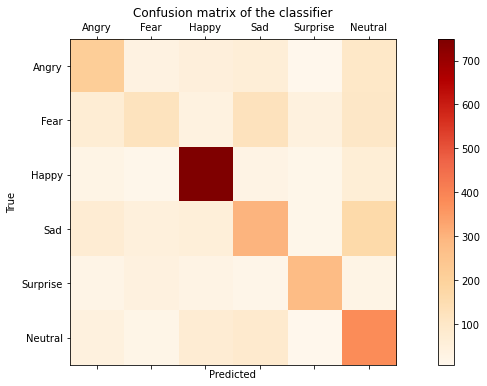

0.5791112369091423

In [75]:
confusion_mat_plot(pred_labels_formatted_4)
accuracy_score(raw_test_labels, pred_labels_formatted_4)

In [76]:
pred_test_labels_3 = model3.predict(test_images)
pred_labels_formatted_3 = [np.argmax(x) for x in pred_test_labels_3]
pred_categorical_3 = to_categorical(pred_labels_formatted_3)

### cnn_model2 evaluation

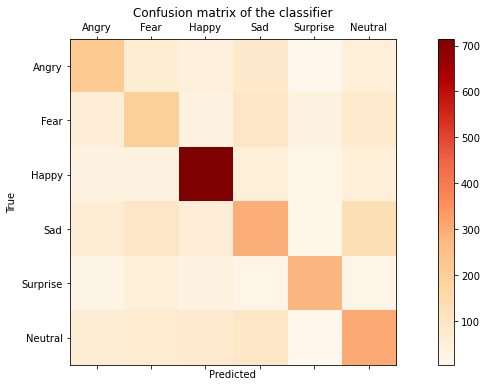

0.5680724596660063

In [77]:
confusion_mat_plot(pred_labels_formatted_3)
accuracy_score(raw_test_labels, pred_labels_formatted_3)